In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
data = pd.read_csv("data.csv")
print (data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [69]:
data.drop(['Unnamed: 32','id'], axis = 1)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

In [42]:
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis = 1)

In [70]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.15, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (32, 483)
x test:  (32, 86)
y train:  (483,)
y test:  (86,)


In [72]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b
    print(type(y_train), y_train.dtype)
    print(type(y_test), y_test.dtype)
    y_train = y_train.astype(float)
    y_test = y_test.astype(float)


In [61]:
# z = np.dot(w.T, x_train)+b
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))


In [73]:
def forward_backward_propagation(w, b, x_train, y_train):
    m = x_train.shape[1]
    z = np.dot(w.T, x_train) + b
    a = sigmoid(z)

    epsilon = 1e-15
    cost = (-1 / m) * np.sum(y_train * np.log(a + epsilon) + (1 - y_train) * np.log(1 - a + epsilon))

    dw = (1 / m) * np.dot(x_train, (a - y_train).T)
    db = (1 / m) * np.sum(a - y_train)

    gradients = {"derivative_weight": dw, "derivative_bias": db}
    return cost, gradients
        derivative_weight = (np.dot(x_train, (
        (y_head - y_train).T))) / x_train.shape[1]
    derivative_bias = np.sum(
        y_head-y_train) / x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,
                 "derivative_bias": derivative_bias}
    return cost, gradients


In [74]:
np.random.seed(0)
x_train = np.random.rand(2, 100)
y_train = (x_train[0, :] + x_train[1, :] > 1).astype(int).reshape(1, 100)

x_test = np.random.rand(2, 20)
y_test = (x_test[0, :] + x_test[1, :] > 1).astype(int).reshape(1, 20)


In [75]:
def update(w, b, x_train, y_train, learning_rate, num_iterations):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(num_iterations):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)

        w -= learning_rate * gradients["derivative_weight"]
        b -= learning_rate * gradients["derivative_bias"]

        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" % (i, cost))

    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")
    plt.title("Cost Reduction Over Iterations")
    plt.show()

    return parameters, gradients, cost_list



In [76]:
def predict(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    for i in range(z.shape[1]):
        Y_prediction[0, i] = 1 if z[0, i] > 0.5 else 0
    return Y_prediction

Cost after iteration 0: 0.690947
Cost after iteration 10: 0.593383
Cost after iteration 20: 0.536100
Cost after iteration 30: 0.490326
Cost after iteration 40: 0.453260
Cost after iteration 50: 0.422794
Cost after iteration 60: 0.397376
Cost after iteration 70: 0.375870
Cost after iteration 80: 0.357438
Cost after iteration 90: 0.341456


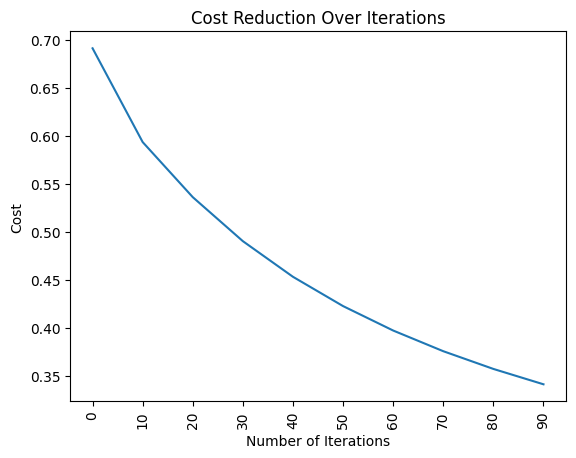

Train accuracy: 93.0 %
Test accuracy: 90.0 %


In [77]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)

    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)

    print("Train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("Test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

np.random.seed(0)
x_train = np.random.rand(2, 100)
y_train = (x_train[0, :] + x_train[1, :] > 1).astype(int).reshape(1, 100)

x_test = np.random.rand(2, 20)
y_test = (x_test[0, :] + x_test[1, :] > 1).astype(int).reshape(1, 20)

logistic_regression(x_train, y_train, x_test, y_test, learning_rate=1, num_iterations=100)